In [52]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

input_path = 'images/'
output_path = 'results/'

In [53]:
""" Compute the Fourier Transform """
img = cv.imread(input_path + '3_Riot_Riot_3_3.jpg', 0)
# find the Fourier Transform
f = np.fft.fft2(img)
# Shift to center the zero freq (DC) component 
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

cv.imwrite(output_path + 'magnitude_spectrum.jpg', magnitude_spectrum)

True

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

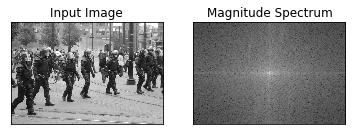

In [54]:
plt.subplot(1, 2, 1), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

In [57]:
""" Apply a HPF and Invert the Fourier Transform  """
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# remove the low frequencies by masking with a rectangular window of size 60x60
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

cv.imwrite(output_path + 'hpf.jpg', img_back)

True

(Text(0.5, 1.0, 'Image after HPF'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

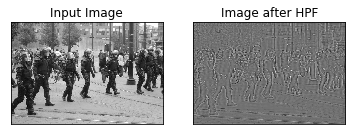

In [56]:
plt.subplot(1,2,1), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])